In [0]:
%matplotlib inline
import tensorflow as tf
import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [0]:
def train_model(features,labels, mode):
  
  # Reshapinng the input
  input_layer = tf.reshape(features["x"], [-1, 28, 28, 1])
    
  # Convolutional Layer #1 and Pooling Layer #1
  conv1 = tf.layers.conv2d(inputs = input_layer, filters = 64, kernel_size = [3,3], strides = 1, padding="same", activation=tf.nn.relu)
  pool1 = tf.layers.max_pooling2d (inputs = conv1,strides=1, pool_size = [2,2])
  # Convolutional Layer #2 and Pooling Layer #2
  conv2 = tf.layers.conv2d(inputs = pool1, filters = 32, kernel_size = [3,3], strides = 1, padding="same", activation=tf.nn.relu)
  pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=1)
  dropout_1 = tf.layers.dropout(inputs=pool2, rate=0.25, training=mode == tf.estimator.ModeKeys.TRAIN)
  # Convolutional Layer #2 and Pooling Layer #2
  #conv3 = tf.layers.conv2d( inputs=dropout_1, filters=128, kernel_size=[5, 5], padding="same", activation=tf.nn.relu)
  #pool3 = tf.layers.max_pooling2d(inputs=conv3, pool_size=[2, 2], strides=2)
  #dropout_2 = tf.layers.dropout(inputs=pool3, rate=0.25,training=mode == tf.estimator.ModeKeys.TRAIN )
  flatten_1= tf.reshape(dropout_1, [-1,26*26*32])
  dense = tf.layers.dense(inputs= flatten_1,units=128,activation=tf.nn.relu)
  #dropout= tf.layers.dropout(inputs=dense, rate=0.4, training=mode == tf.estimator.ModeKeys.TRAIN)
  output_layer = tf.layers.dense(inputs= dense, units=10)
  
  predictions={"classes":tf.argmax(input=output_layer, axis=1), "probabilities":tf.nn.softmax(output_layer,name='softmax_tensor')}
  
  if mode==tf.estimator.ModeKeys.PREDICT:
      return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)
    
  loss= tf.losses.sparse_softmax_cross_entropy(labels=labels, logits= output_layer, scope='loss')
  
  if mode==tf.estimator.ModeKeys.TRAIN:
    optimizer= tf.train.AdamOptimizer(learning_rate=0.001)
    train_op= optimizer.minimize(loss=loss, global_step=tf.train.get_global_step())
    return tf.estimator.EstimatorSpec(mode=mode, loss=loss,train_op=train_op )
    
  eval_metrics_op={ "accuracy":tf.metrics.accuracy(labels=labels,predictions=predictions["classes"])}
  return tf.estimator.EstimatorSpec(mode=mode, loss=loss, eval_metric_ops=eval_metrics_op)

In [0]:
def evaluation(x_test,y_test):
  eval_input_fn = tf.estimator.inputs.numpy_input_fn(x={"x": x_test}, y=y_test, num_epochs=1, shuffle=False)
  eval_results = fashion_classifier.evaluate(input_fn=eval_input_fn)
  print(eval_results)
  
  print("\n Some test images: \n")
  for i in range(10):                                             # Print first 10 test images with output classes 
    img = x_test[i].reshape((28,28))
    plt.imshow(img, cmap="Greys")
    plt.show()
    print("Target Value: ",target_dict.get(y_test_pred[i]))

W0813 05:19:02.223256 140241427101568 estimator.py:1811] Using temporary folder as model directory: /tmp/tmpdoxq6n7m


Train shape: X=(60000, 28, 28), y=(60000,)
Test shape: X=(10000, 28, 28), y=(10000,)
{'accuracy': 0.8983, 'loss': 0.27620685, 'global_step': 1500}

 Some test images: 



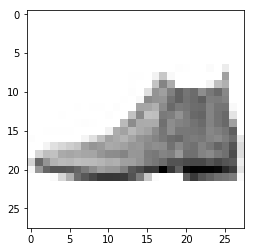

Target Value:  Ankle boot


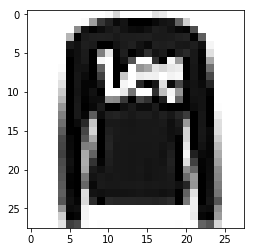

Target Value:  Pullover


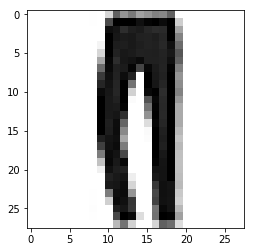

Target Value:  Trouser


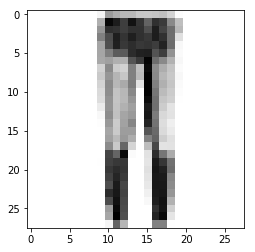

Target Value:  Trouser


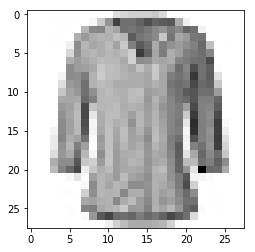

Target Value:  Shirt


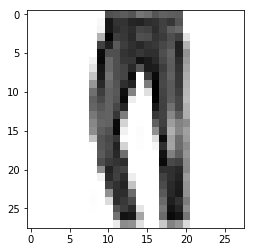

Target Value:  Trouser


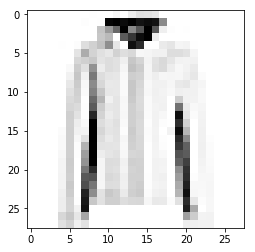

Target Value:  Coat


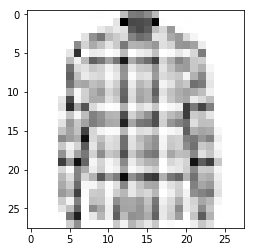

Target Value:  Shirt


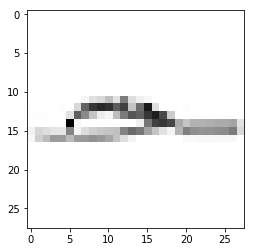

Target Value:  Sandal


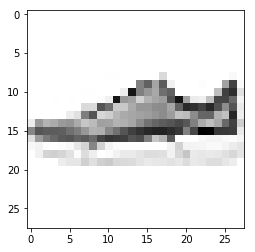

Target Value:  Sneaker


In [0]:
  # Data preprocessing
  ((x_train, y_train), (x_test,y_test)) = tf.keras.datasets.fashion_mnist.load_data()
  target_dict = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover' , 3: 'Dress', 4: 'Coat' , 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}
  print('Train shape: X=%s, y=%s' % (x_train.shape, y_train.shape))
  print('Test shape: X=%s, y=%s' % (x_test.shape, y_test.shape))
  x_train = x_train.astype('float32')
  x_test = x_test.astype('float32')
  x_train /= 255                                                  # Grayscale (0-255), convert into [0,1]
  x_test /= 255
  y_train = y_train.astype('int32') 
  y_test = y_test.astype('int32')
    
  # Training model
  fashion_classifier = tf.estimator.Estimator(model_fn = train_model)
  train_input_fn = tf.estimator.inputs.numpy_input_fn(x={"x": x_train}, y= y_train, batch_size=100, num_epochs=None, shuffle=True)
  fashion_classifier.train(input_fn=train_input_fn, steps=1500)
  
  # Evaluation
  evaluation(x_test,y_test)